# Analysis of High School and Middle School Smoking Tendencies
##### By Brian He 
#### 05.2017

## Abstract
The following project seeks to deepend the understanding of smoking behavior among middle school and high school students by using data provided by the Centers for Disease Control and Prevention (CDC)’s ‘Youth Tobacco Survey (YTS), More specifically, one can determine the significance of change between 2000 and 2015 through hypothesis testing, histogramming, and linear regression. Analysis such as this important because one can draw conclusions on how social media and advertisement has affected youth smoking over time. 

## Hypothesis Testing - Wilcoxon Sum of Ranks Test

The first hypothesis test run on the data is the Wilcoxon Sum of Ranks Test. The purpose of the Wilcoxon Sum of Ranks Test is to see if two sets of unmatched and unpaired data come from the same distribution. For the analysis of tobacco smoking, the test is used to see whether the percentage of high school smokers in 2000 come from the same distribution as high school smokers in 2015. A more specific null hypothesis would be that there is no significant change in the percentage of high school smokers in 2000 as compared to 2015. Obtaining a p-value, we can compare this with a predetermined alpha value of 5%, to account for random chances occurrences, to determine whether our null hypothesis can be rejected. In python, scipy.stats.ranksums can access the wilcoxon sum of ranks test.

#### Mathematics of Wilcoxon Sum of Ranks Test
For two different sets of data, $X$ and $Y$, with samples of $n_X$ and $n_Y$, respectively, one allows $R_i$ to be the rank of the sample size and $W$ to be the value obtained from the test, we have as follows.

$$ W = n_X\times n_Y + \frac{n_Y \times{n_Y +1}}{2} - \sum^{n_Y}_{i=n_X +1} R_i$$



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
YTData = pd.read_csv('Youth_Tobacco.csv')

HS2015 = YTData[(YTData.YEAR == 2015) & (YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'High School') & (YTData.Gender == 'Overall')]
HS2015Current = HS2015['Data_Value'] 
#slices data to obtain matrix of current high school smokers in 2015

HS2000 = YTData[(YTData.YEAR == 2000) & (YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'High School') & (YTData.Gender == 'Overall')]
HS2000Current = HS2000['Data_Value']
#slices data to obtain matrix of current high school smokers in 2000

#Sum of ranks
alpha = 0.05
print('Null hypothesis is that there have been no significant change in smoking behavior among high school students from 2000 to 2015')
_,pvalue = ss.ranksums(HS2015Current, HS2000Current)
if pvalue < alpha:
    print('One should reject null hypothesis because the {:.5f} value is less than the alpha value of {:.5f}'.format(pvalue,alpha))
else:
    print('One should not reject null hypothesis because the {:.5f} value is less than the alpha value of {:.5f}'.format(pvalue,alpha))

Null hypothesis is that there have been no significant change in smoking behavior among high school students from 2000 to 2015
One should reject null hypothesis because the 0.00001 value is less than the alpha value of 0.05000


In [4]:
MS2015 = YTData[(YTData.YEAR == 2015) & (YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'Middle School') & (YTData.Gender == 'Overall')]
MS2015Current = MS2015['Data_Value'] 
#slices data to obtain matrix of current middle school smokers in 2015

MS2000 = YTData[(YTData.YEAR == 2000) & (YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'Middle School') & (YTData.Gender == 'Overall')]
MS2000Current = MS2000['Data_Value']
#slices data to obtain matrix of current middle school smokers in 2000

#Sum of ranks
alpha = 0.05
print('Null hypothesis is that there have been no significant change in smoking behavior for middle school students from 2000 to 2015')
_,pvalueMS = ss.ranksums(MS2015Current, MS2000Current)
if pvalue < alpha:
    print('One should reject null hypothesis because the {:.7f} value is less than the alpha value of {:.7f}'.format(pvalueMS,alpha))
else:
    print('One should not reject null hypothesis because the {:.7f} value is less than the alpha value of {:.7f}'.format(pvalueMS,alpha))

Null hypothesis is that there have been no significant change in smoking behavior for middle school students from 2000 to 2015
One should reject null hypothesis because the 0.0000021 value is less than the alpha value of 0.0500000


## Histogramming
Because the Wilcoxon Sum of Ranks Test does not allow one to visualize data well, histogramming is provided in order to view a more concrete difference between the two data sets in focus. By using widget functions associated with python, a drop down menu is able to be created for data associated with both high school and middle school students from 1999 to 2015.

In [4]:
from IPython.html import widgets
from IPython.display import display
import matplotlib.ticker as ticker

HS = YTData[ (YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'High School') & (YTData.Gender == 'Overall')]
HS_Polish = HS[['YEAR','Data_Value']]
#Slices data to obtain matrix of year and smoking percentange for current high school smokers regardless of gender
def HSYear(Year):
    '''This function returns the graph of smoking percentage of high school students vs the number of states 
        
    Args:
        Year: an int specifying which year wanted to be used
    
    Returns: 
        returns the graph of smoking percentage vs the number of states
    
    '''
    x = Year # For the year in title axis
    HS_PolishYear = HS_Polish[HS_Polish.YEAR == Year]  #specifying year
    SmokingPercent = HS_PolishYear['Data_Value']     #creating matrix of only smoking percent for that year
    fig, ax = plt.subplots()       #creating subplots for manipulation
    plt.style.use('fivethirtyeight')
    plt.title('Percent of High School Smokers in {}'.format(x))
    plt.xlabel('Percentage of Current Smokers (Surveyed by State)')
    plt.ylabel('Frequency (Number of States)')
    fig = plt.hist(SmokingPercent, rwidth = 0.9, color = 'purple')
    for axis in [ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True)) #setting y-axis to be only integers

    return plt.show()
    
drop = widgets.Dropdown(      #creating widget for dropdown with list of year options
    options = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] ,
    description = 'Choose the Year For High School Smokers')
widget = widgets.interactive(HSYear, Year = drop)
display(widget)


C:\Users\bhbri\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(Dropdown(description='Choose the Year For High School Smokers', options=(1999, 2000, 200…

In [5]:
MS = YTData[ (YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'Middle School') & (YTData.Gender == 'Overall')]
MS_Polish = MS[['YEAR','Data_Value']]

#Slices data to obtain matrix of year and smoking percentange for current middle school smokers regardless of gender
def MSYear(Year):
    '''This function returns the graph of smoking percentage of middle school students vs the number of states 
        
    Args:
        Year: an int specifying which year wanted to be used
    
    Returns: 
        returns the graph of smoking percentage vs the number of states
    
    '''
    x = Year # For the year in title saxis
    MS_PolishYear = MS_Polish[MS_Polish.YEAR == Year] #specifying year
    SmokingPercentMS = MS_PolishYear['Data_Value']  #creating matrix of only smoking percent for that year
    fig2, ax2 = plt.subplots() #creating subplots for manipulation
    plt.style.use('fivethirtyeight')
    plt.title('Percent of Middle Smokers in {}'.format(x))
    plt.xlabel('Percentage of Current Smokers (Surveyed by State)')
    plt.ylabel('Frequency (Number of States)')
    fig2 = plt.hist(SmokingPercentMS, rwidth = 0.9, color = 'blue')
    for axis in [ax2.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True)) #creating only integer ticks for y-axis
    return plt.show()
  
dropMS = widgets.Dropdown( #creates widget for middle school smokers with drop down of years
    options = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] ,
    description = 'Choose the Year For Middle School Smokers')
widgetMS = widgets.interactive(MSYear, Year = dropMS)
display(widgetMS)

interactive(children=(Dropdown(description='Choose the Year For Middle School Smokers', options=(1999, 2000, 2…

## Shapiro-Wilk Test
To determine if smoking percent in 2000 and smoking percent in 2015 are normally distributed, the Shapiro Wilk Test is performed. The null hypothesis is that the data is normally distributed. The alpha value is 5% or 0.05 to account for random chances of probability.

### Mathematics Behind Shapiro Wilk Test
A $W$ statistic is calculated where

$$W = \frac{\bigg{(}\sum_{i=1}^n{a_i x_i}\bigg{)}^2}{\sum_{i=1}^n{(x_i - \bar{x})^2}}$$

and $x_i$ is the order statistic (for example the 'i'-th smallest number in the sample, $\bar{x}$ is the sample mean and $a_i$ is a constant.

In [6]:
#TEST FOR NORMAL DISTRIBUTION SHAPIRO WILKS HIGH SCHOOL
alpha = 0.05
pHS2015 = ss.shapiro(HS2015Current)[1]
if pHS2015 < alpha:
    print (('Because the p value, {:.4f} is less than the alpha value, we reject the null hypothesis that the percent of high school smokers in the United States come from a normal distribution').format(pHS2015))
else:
    print (('Because the p value, {:.4f} is greater than the alpha value given, we cannot reject the null hypothesis that the percent high  school smokers in the United States come from a normal distribution').format(pHS2015))

    
pHS2000 = ss.shapiro(HS2000Current)[1]
if pHS2000 < alpha:
    print (('Because the p value, {:.4f} is less than the alpha value, we reject the null hypothesis that the percent of high school smokers in the United States come from a normal distribution').format(pHS2000))
else:
    print (('Because the p value, {:.4f} is greater than the alpha value given, we cannot reject the null hypothesis that the percent for high school smokers in the United States come from a normal distribution').format(pHS2000))

Because the p value, 0.9354 is greater than the alpha value given, we cannot reject the null hypothesis that the percent high  school smokers in the United States come from a normal distribution
Because the p value, 0.0059 is less than the alpha value, we reject the null hypothesis that the percent of high school smokers in the United States come from a normal distribution


In [7]:
#TEST FOR NORMAL DISTRIBUTION SHAPIRO WILKS MIDDLE SCHOOL
alpha = 0.05
pMS2015 = ss.shapiro(MS2015Current)[1]
if pMS2015 < alpha:
    print (('Because the p value, {:.4f} is less than the alpha value, we reject the null hypothesis that the percent of middle school smokers in the United States come from a normal distribution').format(pMS2015))
else:
    print (('Because the p value, {:.4f} is greater than the alpha value, we cannot reject the null hypothesis that the percent of middle   school smokers in the United States come from a normal distribution').format(pMS2015))

pMS2000 = ss.shapiro(MS2000Current)[1]
if pMS2000 < alpha:
    print (('Because the p value, {:.4f} is less than the alpha value, we reject the null hypothesis that the percent of middle school smokers in the United States come from a normal distribution').format(pMS2000))
else:
    print (('Because the p value, {:.4f} is greater than the alpha value, we cannot reject the null hypothesis that the percent of middle   school smokers in the United States come from a normal distribution').format(pMS2000))

Because the p value, 0.6406 is greater than the alpha value, we cannot reject the null hypothesis that the percent of middle   school smokers in the United States come from a normal distribution
Because the p value, 0.9810 is greater than the alpha value, we cannot reject the null hypothesis that the percent of middle   school smokers in the United States come from a normal distribution


##  Regression
#### Linear Regression
To continue the analysis of youth smoking behavior over time, regression will be used. Essentially, using the data sets provided, models are estimated. The method used is Ordinary Least Squares Regression in 1D (OLS-1D)

In linear regression, the data is assumed to be linear with the following form:
$$ y = \alpha + \beta x + \epsilon$$ where $\epsilon$ is a noise term, which is usually assumed to be normally distributed.
Our model will be based
$$ \hat{y} = \hat{\alpha} +  \hat{\beta}x $$
where the 'hats' represent the estimates.

When actually fitting the line, it will be based on the least squares, which is given by
$$\hat\beta = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_x^2}, \\
\hat\alpha = \frac{1}{N}\sum\limits_i (y_i - \hat\beta x_i)$$

$$\frac{\sigma_{xy}}{\sigma_x^2}$$ represents covariance divided by the variance of x.

The goodness of fit is found to see how well the line fits the data. One should note that the particular value found may not have a high $R^2$ value which would correspond to good correlation, it would not mean that all linear fits themselves would not fit well. R would be the correlation coefficient.

To calculate goodness of fit one looks at the following equation,
$$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(\hat{y}_i - y\right)^2}{\sum_i \left(\bar{y} - y\right)^2}$$

Here, SSR is the sum of square residuals, obtained by taking our estimated y, subtracting the actual y from it and squaring.
TSS is total sum of squares which accounts for the variation in given y data.

### High School
The first step will be to plot the data set and the fitted line

The beta hat value obtained is -1.0659 
The alpha hat value obtained is 2159.1297 
Model equation is y_hat =  2159.1297 + -1.0659x


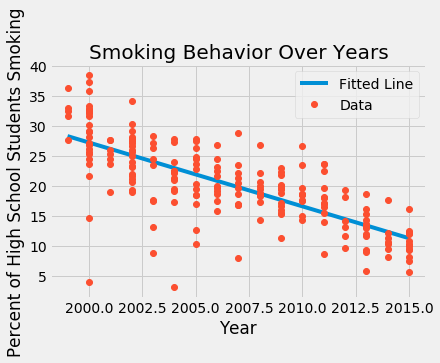

Goodness of fit R^2 is 0.5355726266975843


In [8]:
HSData = YTData[(YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'High School') & (YTData.Gender == 'Overall')]

xvalue = HSData.YEAR
yvalue = HSData.Data_Value

import numpy as np
cov = np.cov(xvalue,yvalue,ddof=2) #get covariance matrix
#diagonal is variances, so we can just index to get all data we need:
beta_hat = cov[0,1]/cov[0,0] 
alpha_hat = np.mean(yvalue - beta_hat*xvalue)
print('The beta hat value obtained is {:.4f} '.format(beta_hat))
print('The alpha hat value obtained is {:.4f} '.format(alpha_hat))
print('Model equation is y_hat =  {:.4f} + {:.4f}x'.format(alpha_hat,beta_hat))


#Plot the model fit
import matplotlib.pyplot as plt
y_hat = alpha_hat + beta_hat*xvalue
plt.plot(xvalue,y_hat,'-', label = 'Fitted Line')
plt.plot(xvalue,yvalue, 'o', label = 'Data')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percent of High School Students Smoking")
plt.title("Smoking Behavior Over Years", fontsize = 20)
plt.show()

def SSR(beta):
    '''This function returns the sum of square residuals given a beta argument with respect to high school fit
        
    Args:
        beta: the estimated coefficient. A float.
    
    Returns: 
        sum of square residual
    
    '''
    y_hat = alpha_hat + beta_hat*xvalue
    residuals = y_hat - yvalue
    return np.sum(residuals**2)

ssr = SSR(beta_hat) #Find sum of square residuals
tss = np.sum((yvalue-np.mean(yvalue))**2) 
rsq = 1 - (ssr/tss) #returns r squared
print('Goodness of fit R^2 is {}'.format(rsq))

### Spearman Correlation Test
The Spearman Correlation Test will see if there is correlation between year and the percentage of high school smokers. The null hypothesis will be that the year and the percentage of high school smokers are not correlated.

In [9]:
corr_year_percent = ss.spearmanr(xvalue, yvalue)[1]
alpha = 0.05
if corr_year_percent < alpha:
    print("The p-value is {:.4}, which is less than the alpha value and therefore we reject the null hypothesis.".format(corr_year_percent))
else:
    print("The p-value is {:.4}, which is less than the alpha value and therefore we cannot reject the null hypothesis.".format(corr_year_percent))

The p-value is 5.171e-37, which is less than the alpha value and therefore we reject the null hypothesis.


## Middle School Regression

Begin by the plotting relationship and plotting fit line.

The alpha hat value obtained is 1235.8069 
The alpha hat value obtained is -0.6122 
Model equation is y_hat =  1235.8069 + -0.6122x


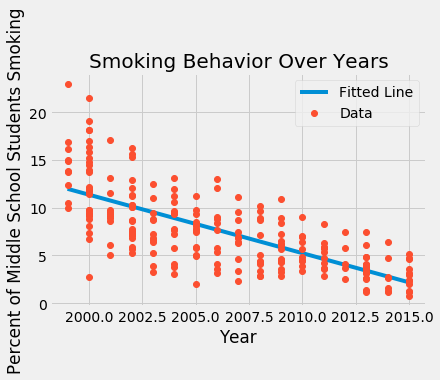

Goodness of fit R^2 is 0.5078944527603512


In [10]:
#Start with plotting relationship
MSData = YTData[(YTData.MeasureDesc == 'Smoking Status') & (YTData.Response == 'Current') 
                  & (YTData.Education == 'Middle School') & (YTData.Gender == 'Overall')]

xvalueMS = MSData.YEAR
yvalueMS = MSData.Data_Value

cov = np.cov(xvalueMS,yvalueMS,ddof=2) #get covariance matrix
#diagonal is variances, so we can just index to get all data we need:
beta_hat2 = cov[0,1]/cov[0,0]
alpha_hat2 = np.mean(yvalueMS - beta_hat2*xvalueMS)
print('The alpha hat value obtained is {:.4f} '.format(alpha_hat2))
print('The alpha hat value obtained is {:.4f} '.format(beta_hat2))
print('Model equation is y_hat =  {:.4f} + {:.4f}x'.format(alpha_hat2,beta_hat2))

#Plot the model fit
import matplotlib.pyplot as plt
y_hat = alpha_hat2 + beta_hat2*xvalueMS
plt.plot(xvalueMS,y_hat,'-', label = 'Fitted Line')
plt.plot(xvalueMS,yvalueMS, 'o', label = 'Data')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percent of Middle School Students Smoking")
plt.title("Smoking Behavior Over Years", fontsize = 20)
plt.show()

def SSR(beta):
    '''This function returns the sum of square residuals given a beta argument with respect to middle school fit
        
    Args:
        beta: the estimated coefficient. A float.
    
    Returns: 
        sum of square residual
    
    '''
    y_hat = alpha_hat2 + beta_hat2*xvalueMS
    residuals = y_hat - yvalueMS
    return np.sum(residuals**2)

ssr = SSR(beta_hat2) #Find sum of square residuals
tss = np.sum((yvalueMS-np.mean(yvalueMS))**2) 
rsq = 1 - (ssr/tss)
print('Goodness of fit R^2 is {}'.format(rsq))

### Spearman Correlation Test
The Spearman Correlation Test will see if there is correlation between year and the percentage of middle school smokers. The null hypothesis will be that the year and the percentage of high school smokers are not correlated.

In [11]:
corr_year_percent2 = ss.spearmanr(xvalueMS, yvalueMS)[1]
alpha = 0.05
if corr_year_percent2 < alpha:
    print("The p-value is {:.4}, which is less than the alpha value and therefore we reject the null hypothesis.".format(corr_year_percent2))
else:
    print("The p-value is {:.4}, which is less than the alpha value and therefore we cannot reject the null hypothesis.".format(corr_year_percent2))

The p-value is 5.003e-40, which is less than the alpha value and therefore we reject the null hypothesis.


## Conclusions 
By using the Wilcoxon sum of ranks test, one can conclude that there may have been a significant change from 2000 to 2015 when analyzing the percentage of both high school and middle school smokers. Through the Shapiro-Wilk test, one can conclude that only high school smoker percentage from 2000 cannot come from a normal distribution. Lastly, we can see that the particular linear fits found are decent for the data but not perfect due to a low R^2 value. This type of analysis is interesting and useful because one can see that there may be a significant change in smoking behavior over time with data coming from a normal distribution. The next question one may ask is what has caused this change? One idea to consider is the affect of social media. Are advertisements and commercials working to reduce smoking? Are companies implementing these commercials actually doing so cost efficiently. There is vast amount of data in such topic and should definitely be further investigated.

## Sources 

Wayne W. LaMorte, "Mann Whitney U Test (Wilcoxon Rank Sum Test)", 2016

Michael Ash,"Linear Regression with One Regressor-Michael Ash-Lecture 12" , 2008

Center for Disease Control and Prevention, "Youth Tobacco Survey", 2017

Andrew White, CHE 116 Lecture Notes, 2017